In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [3]:
#Import Dataset
df = pd.read_csv("Product List.csv")
df.head()

,Product_ID,List_Price,Description,Colour,Category,Design,Pattern
0,203030101,49.99,Relaxed And Casual Shirts White Plain,White,Shirts,Relaxed And Casual,Plain
1,101050703,99.99,Contemporary And Clean Jackets Red Geometric,Red,Jackets,Contemporary And Clean,Geometric
2,102050701,49.99,Utility And Basics Jackets Red Plain,Red,Jackets,Utility And Basics,Plain
3,202040503,129.99,Utility And Basics Pants Green Geometric,Green,Pants,Utility And Basics,Geometric
4,103010103,39.99,Relaxed And Casual Hats White Geometric,White,Hats,Relaxed And Casual,Geometric


In [4]:
#Remove Product Names and ID
df1 = df.drop('Description',axis = 1)
df1 = df1.drop('Product_ID', axis = 1)
df1.head()

,List_Price,Colour,Category,Design,Pattern
0,49.99,White,Shirts,Relaxed And Casual,Plain
1,99.99,Red,Jackets,Contemporary And Clean,Geometric
2,49.99,Red,Jackets,Utility And Basics,Plain
3,129.99,Green,Pants,Utility And Basics,Geometric
4,39.99,White,Hats,Relaxed And Casual,Geometric


In [5]:
#Feature Scaling
listPrice = df1['List_Price']
mean = np.mean(listPrice)
std = np.std(listPrice)
df1['List_Price'] = df1['List_Price'] - mean
df1['List_Price'] = np.divide(df1['List_Price'],std)

In [64]:
mean
std

44.876588482882774

In [6]:
#Convert categorical data to numerical
X = pd.get_dummies(df1)

In [7]:
X.head()

,List_Price,Colour_Black,Colour_Blue,Colour_Brown,Colour_Green,Colour_Orange,Colour_Pink,Colour_Purple,Colour_Red,Colour_White,...,Pattern_Animal Print,Pattern_Check,Pattern_Floral,Pattern_Geometric,Pattern_Houndstooth,Pattern_Paisley,Pattern_Plaid,Pattern_Plain,Pattern_Polka Dots,Pattern_Striped
0,-0.578022,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.536144,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.578022,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.204644,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.800856,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [8]:
X.shape

(431, 37)

In [9]:
#Train a variety of KMeans models with differing cluster sizes
scores = []
for i in range(2,101):
    model = KMeans(n_clusters = i, random_state=10)
    model.fit(X);
    score = model.score(X)
    scores.append(score)

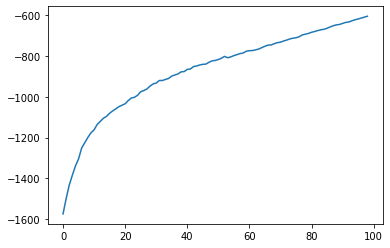

In [10]:
#Plot Model Scores
plt.plot(scores);

In [12]:
#Train Final Model
chosenNumOfClusters = 45
fnlModel = KMeans(n_clusters = chosenNumOfClusters, random_state=32)
fnlModel.fit(X);

In [13]:
predictions = fnlModel.predict(X)

In [17]:
counts = {}
for i in predictions:
    if i in counts.keys():
        counts[i] = counts[i] + 1
    else:
        counts[i] = 1
print(min(counts.values()))
print(max(counts.values()))
print(sum(counts.values())/len(counts.values()))

5
15
9.577777777777778


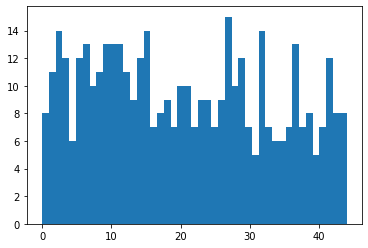

In [61]:
plt.hist(predictions,bins=45);

In [62]:
#Save Model
filename = 'kmeanSimilarityModel'
pickle.dump(fnlModel, open(filename,'wb'))

In [77]:
#Save predictions ot
predDf = pd.DataFrame({"Product_ID": df['Product_ID'], "Cluster":predictions})
predDf.to_csv('Clusters.csv',index=False)